## Toxic Comment Classification
### Author : Shweta Gupta
### Date     : 02/12/2020

## Part 1 - EDA & Text Mining ##

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize

In [5]:
#loading dataset
data = pd.read_csv("C:\\Users\shwet\Documents\shweta\Winter_2020\A\Predictive\Group_Project/train.csv")
data.head(4)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0


In [6]:
#import pandas_profiling
import pandas_profiling


In [7]:
pandas_profiling.ProfileReport(data)

In [ ]:
data.isnull().sum().sum()

In [6]:
total_rows = data.shape[0]
total_columns = data.shape[1]
data.isnull().sum()
print('Total number of rows : '+str(total_rows))
print('Total number of columns : '+str(total_columns))
print('Missing values in the Dataset :' +str(data.isnull().sum().sum()))

Total number of rows : 159571
Total number of columns : 8
Missing values in the Dataset :0


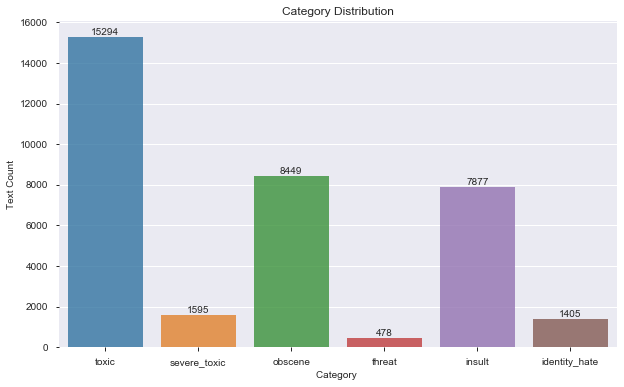

In [18]:
plt.figure(figsize=(10,6))
x=data.iloc[:,2:].sum()
# sns.barplot(x.index,x.values)
# plt.title("Category Distribution", fontsize=20)

#plot

ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Category Distribution")
plt.ylabel('Text Count', fontsize=10)
plt.xlabel('Category ', fontsize=10)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [19]:
data['Clean'] =0 # creating the column
data.loc[(data['severe_toxic'] ==0 ) &(data['threat']==0) & (data['identity_hate']==0)
       & (data['insult']==0)& (data['obscene']==0) & (data['toxic']==0) ,
       'Clean'] = 1

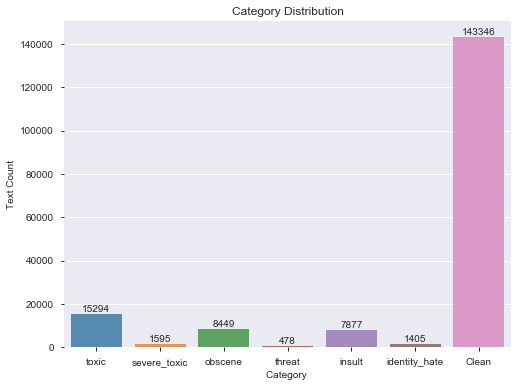

In [21]:
plt.figure(figsize=(8,6))
x=data.iloc[:,2:].sum()
# sns.barplot(x.index,x.values)
# plt.title("Category Distribution", fontsize=20)

#plot

ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Category Distribution")
plt.ylabel('Text Count', fontsize=10)
plt.xlabel('Category ', fontsize=10)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

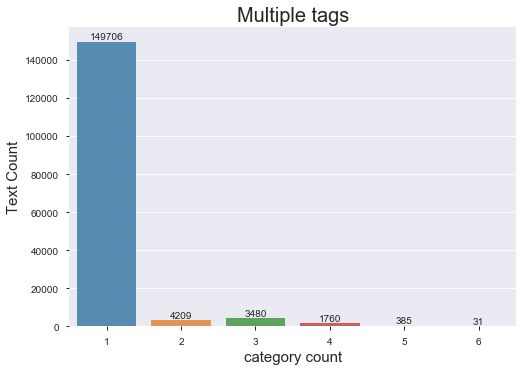

In [59]:
#multilabels
rowsums=data.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
x
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags",fontsize=20)
plt.ylabel('Text Count', fontsize=15)
plt.xlabel('category count', fontsize=15)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

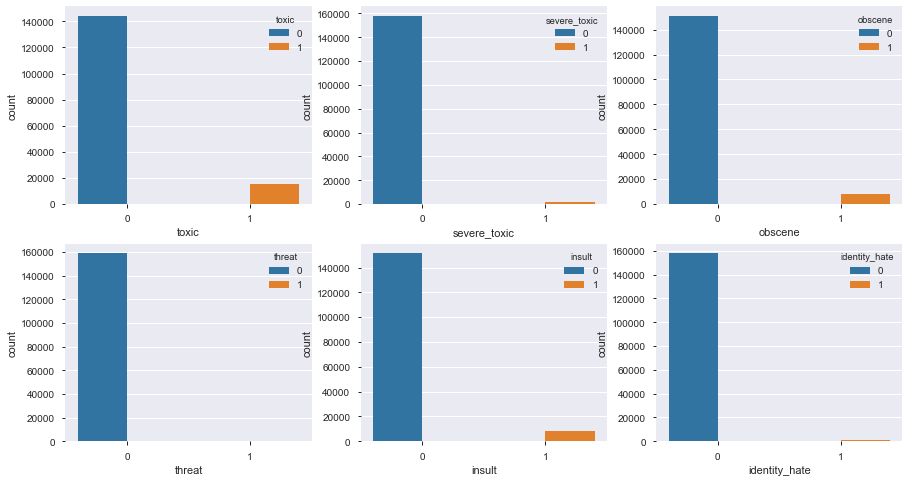

In [17]:
fig,axarr = plt.subplots(2, 3, figsize=(15, 8))
sns.countplot(data.toxic, hue=data.toxic,ax= axarr[0,0])
sns.countplot(data.severe_toxic, hue=data.severe_toxic,ax= axarr[0,1])
sns.countplot(data.obscene, hue=data.obscene,ax= axarr[0,2])
sns.countplot(data.threat, hue=data.threat,ax= axarr[1,0])
sns.countplot(data.insult, hue=data.insult,ax= axarr[1,1])
sns.countplot(data.identity_hate, hue=data.identity_hate,ax= axarr[1,2])

In [24]:
pip install image
pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
# filtering the comment based on toxicity levels
clean_comment = " ".join(review for review in data[data['Clean']==1]['comment_text'])

negative_comment = " ".join(review for review in data[(data['severe_toxic'] ==1 ) | (data['threat']==1) |(data['identity_hate']==1)
       | (data['insult']==1)|(data['obscene']==1) | (data['toxic']==1)]['comment_text'])

severe_toxic_comment = " ".join(review for review in data[(data['severe_toxic'] ==1 )]['comment_text'])

threat_comment = " ".join(review for review in data[(data['threat']==1)]['comment_text'])

identity_hate_comment = " ".join(review for review in data[(data['identity_hate']==1)]['comment_text'])

insult_comment = " ".join(review for review in data[(data['insult']==1)]['comment_text'])

obscene_comment = " ".join(review for review in data[(data['obscene']==1)]['comment_text'])     

toxic_comment = " ".join(review for review in data[(data['toxic']==1)]['comment_text'])

In [2]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

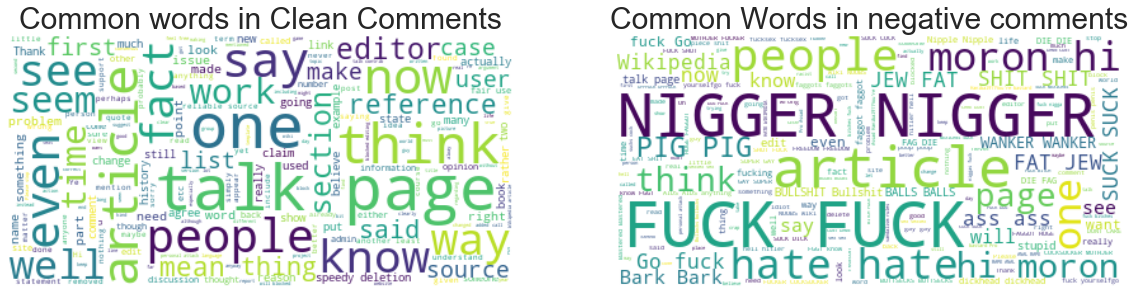

In [27]:
#install wordcloud and image
pip install image
pip install wordcloud

# import libraries 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopword=set(STOPWORDS)

# building the word cloud for clean comments
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(clean_comment)

#plotting the word cloud
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.title("Common words in Clean Comments", fontsize=30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

# building the word cloud for neagtive comments
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(negative_comment)
plt.subplot(2,2,2)
plt.title("Common Words in negative comments", fontsize=30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

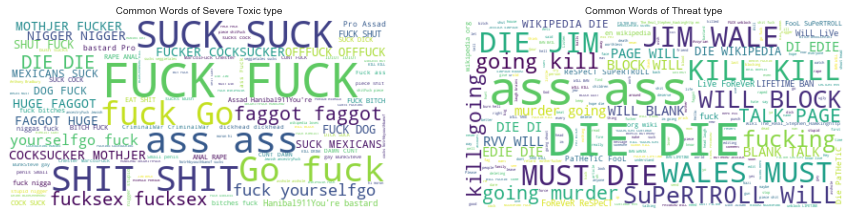

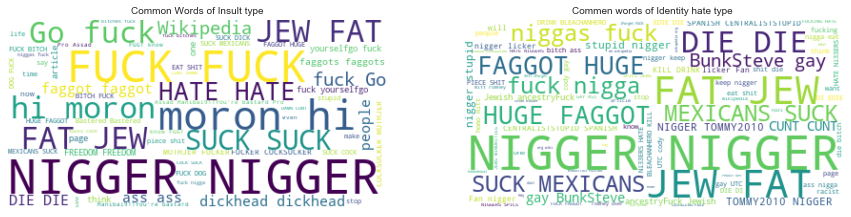

In [28]:
# building the word cloud
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(severe_toxic_comment)

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.title(" Common Words of Severe Toxic type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(threat_comment)
plt.subplot(2,2,2)
plt.title("Common Words of Threat type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")


plt.figure(figsize=(15, 15))

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(insult_comment)
plt.subplot(2,2,3)
plt.title("Common Words of Insult type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear"
          )

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(identity_hate_comment)
plt.subplot(2,2,4)
plt.title("Commen words of Identity hate type ", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

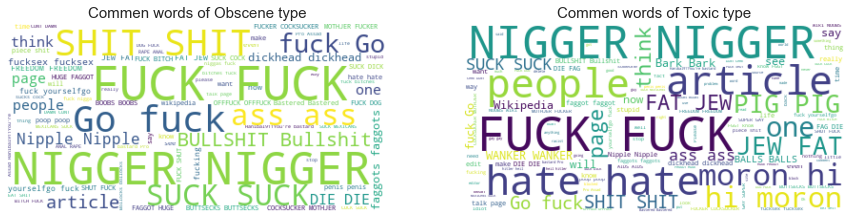

In [29]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(obscene_comment)

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.title("Commen words of Obscene type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(toxic_comment)
plt.subplot(2,2,2)
plt.title("Commen words of Toxic type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")


Text(0.5, 0, 'Length')

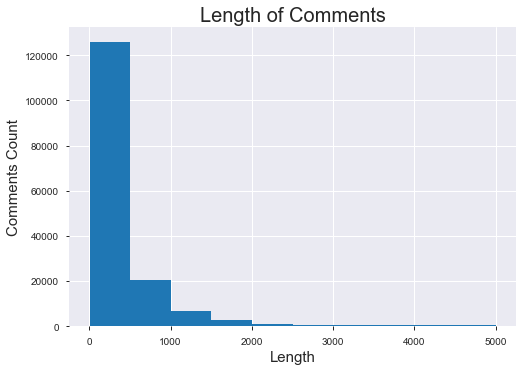

In [61]:
lens = data.comment_text.str.len()
lens.mean(), lens.std(), lens.max(),lens.min()
lens.hist()
plt.title("Length of Comments",fontsize=20)
plt.ylabel('Comments Count', fontsize=15)
plt.xlabel('Length', fontsize=15)

In [62]:
lens.mean(), lens.std(), lens.max(),lens.min()

(394.0732213246768, 590.7202819048919, 5000, 6)

In [30]:
df = data.iloc[ :,2:9]
corrMatrix=df.corr()
corrMatrix

,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.967748
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,-0.298666
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.702812
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.162925
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.677324
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.280144
Clean,-0.967748,-0.298666,-0.702812,-0.162925,-0.677324,-0.280144,1.000000


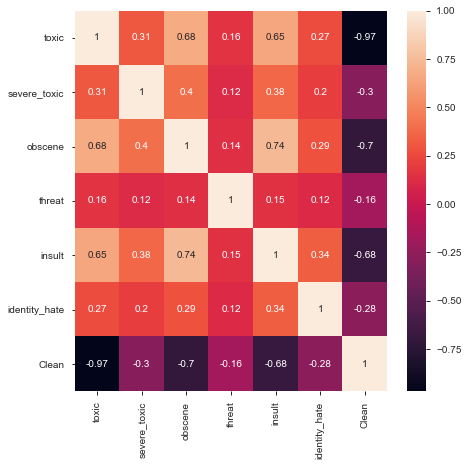

In [31]:
plt.figure(figsize=(7, 7))
sns.heatmap(corrMatrix, annot=True)

## Part 2 - Vectors & Modelling ##

In [4]:
#----------------------------------------------------------------------------------------------------------
#MODELLING
#-------------------------------------------------------------------------------------------------------------
toxic_data = pd.read_csv("C:\\Users\shwet\Documents\shweta\Winter_2020\A\Predictive\Group_Project/train.csv")
toxic_data.head()
toxic_data['word_count'] = toxic_data['comment_text'].apply(lambda x: len(str(x).split(" ")))
toxic_data.iloc[:,2:].head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count
0,0,0,0,0,0,0,42
1,0,0,0,0,0,0,18
2,0,0,0,0,0,0,42
3,0,0,0,0,0,0,112
4,0,0,0,0,0,0,13
5,0,0,0,0,0,0,12
6,1,1,1,0,1,0,8
7,0,0,0,0,0,0,21
8,0,0,0,0,0,0,83
9,0,0,0,0,0,0,12


In [5]:
#-------------------------------------------
#------TEXT MINING ------------------------
#------------------------------------------
#converting the text to lowercase
toxic_data['clean_comments'] = toxic_data['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing punctuation
toxic_data['clean_comments'] = toxic_data['clean_comments'].str.replace('[^\w\s]','')

# removing the stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
toxic_data['clean_comments'] = toxic_data['clean_comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# performing lemmatization
#nltk.download('wordnet')
from textblob import Word
toxic_data['clean_comments'] = toxic_data['clean_comments'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))
toxic_data['clean_comments'].head()

0    explanation edits made username hardcore metal...
1    daww match background colour im seemingly stuc...
2    hey man im really trying edit war guy constant...
3    cant make real suggestion improvement wondered...
4                  sir hero chance remember page thats
Name: clean_comments, dtype: object

In [112]:
#---------------------------------------------------
#------FEATURE EXTRACTION : BOW---------------------
#---------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
tokenCV = RegexpTokenizer(r'[a-zA-Z0-9]+')
comment_count = CountVectorizer(lowercase=True, ngram_range=(1,1),analyzer = "word",tokenizer = tokenCV.tokenize)
comment_count.fit(toxic_data['clean_comments'])
# print(comment_counttt.vocabulary_)
comment_count=comment_count.transform(toxic_data['clean_comments'])
comment_count

C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<159571x237932 sparse matrix of type '<class 'numpy.int64'>'
	with 4435344 stored elements in Compressed Sparse Row format>

In [92]:
from nltk.stem.wordnet import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()
tokenCV = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = tokenCV.tokenize)

In [95]:
import re
import string
w, h = 1,len(toxic_data);
comments_clean = [[0 for x in range(w)] for y in range(h)] 

w, h = 2,len(toxic_data);
comments_sa = [[0 for x in range(w)] for y in range(h)] 

for i in range(0,len(toxic_data)):
	comments = toxic_data.iloc[i,1]
	comments = comments.lower()
	comments = re.sub(r'\d+', '', comments)
	comments = comments.translate(str.maketrans("","", string.punctuation))
	comments = comments.strip()
	comments = lem.lemmatize(comments)
	tokens = word_tokenize(comments)
	comments = [j for j in tokens if not j in stop_words]
	comments_clean[i] = str(comments)
	
text_counts= cv.fit_transform(comments_clean)


In [96]:
text_counts

<159571x221993 sparse matrix of type '<class 'numpy.int64'>'
	with 3874907 stored elements in Compressed Sparse Row format>

In [113]:
#-------------------------------------------------------
#--------spliiting the data---------------------------
#-----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    comment_count, toxic_data.iloc[:,2:8], test_size=0.2, random_state=1)

In [114]:
# creating matrix to store predcicted values
l, b = len(y_train), 6;
Pred_Matrix_train = [[0 for x in range(l)] for y in range(b)] 

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [39]:
#-----------------------------
#-logistic Regression
#-----------------------------
from sklearn.linear_model import LogisticRegression
#defining logistic regression function
def logreg(train_x,train_y,test_x):
    logreg = LogisticRegression(solver='sag')
    logreg.fit(train_x, train_y)
    y_pred = logreg.predict(test_x)
    return y_pred
for i in range(0, 6):
    Pred_Matrix[i] = logreg(X_train, y_train.iloc[:,i],X_test)

# converting the list to dataframe and transposing it
pred = pd.DataFrame(data=Pred_Matrix)
pred_val_rf =pred.T
from sklearn import metrics
print('Accuracy of the Logistic Regression model : '+str(metrics.accuracy_score(ytest, pred_val_rf)))
print('Classification Report for Logistic Regression : ')
print(metrics.classification_report(ytest, pred_val_rf))

In [ ]:
#---------Naive Baye's------
from sklearn.naive_bayes import MultinomialNB
for i in range(0,6):
    clf = MultinomialNB().fit(X_train, y_train.iloc[:,i])
    Pred_Matrix[i]= clf.predict(X_test)
df_nb = pd.DataFrame(data=Pred_Matrix)
pred_val_nb =df_nb.T
print('Accuracy of the Naive Bayes model : '+str(metrics.accuracy_score(ytest, pred_val_nb)))
print('Classification Report for Naive Bayes : ')
print(metrics.classification_report(ytest, pred_val_nb))

In [115]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
for i in range(0,6):
    rf = RandomForestClassifier().fit(X_train, y_train.iloc[:,i])
    Pred_Matrix_train[i]= rf.predict(X_test)
# converting the list to dataframe and transposing it
pred = pd.DataFrame(data=Pred_Matrix_train)
pred_val_rf =pred.T
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(y_test, pred_val_rf)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(y_test, pred_val_rf))

KeyboardInterrupt: 

In [103]:
#-------------XGBoost-------------
# libaries for GBM
from xgboost import XGBClassifier
for i in range(0,6):
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train.iloc[:,i])
    Pred_Matrix_train[i]= xgb_model.predict(X_test)
    
#-----predicting values for test
pred_xgb = pd.DataFrame(data=Pred_Matrix_train)
pred_val_xgb =pred_xgb.T

ValueError: Found input variables with inconsistent numbers of samples: [47872, 31915]

In [135]:
print('Accuracy of the Gradient Boost model : '+str(metrics.accuracy_score(ytest, pred_val_xgb)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred_val_xgb))

Accuracy of the Gradient Boost model : 0.9118900401069518
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.95      0.44      0.60      4695
           1       0.52      0.15      0.23       491
           2       0.91      0.63      0.75      2544
           3       0.58      0.12      0.19       154
           4       0.79      0.48      0.60      2387
           5       0.73      0.24      0.36       442

   micro avg       0.88      0.47      0.61     10713
   macro avg       0.75      0.34      0.46     10713
weighted avg       0.87      0.47      0.60     10713
 samples avg       0.04      0.04      0.04     10713



In [52]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

toxic_data['noun_count'] = toxic_data['comment_text'].apply(lambda x: check_pos_tag(x, 'noun'))
toxic_data['verb_count'] = toxic_data['comment_text'].apply(lambda x: check_pos_tag(x, 'verb'))
toxic_data['adj_count'] = toxic_data['comment_text'].apply(lambda x: check_pos_tag(x, 'adj'))
toxic_data['adv_count'] = toxic_data['comment_text'].apply(lambda x: check_pos_tag(x, 'adv'))
toxic_data['pron_count'] = toxic_data['comment_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [56]:
toxic_data[toxic_data['verb_count']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,clean_comments,noun_count,verb_count,adj_count,adv_count,pron_count


In [54]:
#------------------------------------------------
#--------------------TI -DIF---------------------
#------------------------------------------------

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    toxic_data['clean_comments'], toxic_data.iloc[:,2:8], test_size=0.3, random_state=1)

from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english',ngram_range=(2,3),max_features=5000,lowercase=False)
tfidf_vect.fit(toxic_data['comment_text'])
xtrain_tfidf =  tfidf_vect.fit_transform(xtrain)
xtest_tfidf =  tfidf_vect.transform(xtest)

# #characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',stop_words='english', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(toxic_data['comment_text'])
xtrain_tfidf_chars =  tfidf_vect_ngram_chars.fit_transform(xtrain) 
xtest_tfidf_chars =  tfidf_vect_ngram_chars.transform(xtest)

# stacking the features, wordlevl tf-idf and characters level tf-idf
from scipy import sparse
X = sparse.hstack([xtrain_tfidf, xtrain_tfidf_chars])
x_test = sparse.hstack([xtest_tfidf, xtest_tfidf_chars])

C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_extraction\text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [132]:
print(xtrain_tfidf_chars)

MemoryError: Unable to allocate 108. MiB for an array with shape (28353241,) and data type int32

In [116]:
# creating matrix to store predcicted values
l, b = len(ytrain), 6;
Pred_Matrix = [[0 for x in range(l)] for y in range(b)]

In [64]:
#-------------------------------
#---Logistic
from sklearn.linear_model import LogisticRegression
#defining logistic regression function
def logreg(train_x,train_y,test_x):
    logreg = LogisticRegression(solver='sag')
    logreg.fit(X, ytrain)
    y_pred = logreg.predict(x_test)
    return y_pred
for i in range(0, 6):
    Pred_Matrix[i] = logreg(X, ytrain.iloc[:,i],x_test)
pred_lr = pd.DataFrame(data=Pred_Matrix)
pred_lr_val =pred_lr.T
print('Accuracy of the Logistic Regression model : '+str(metrics.accuracy_score(ytest, pred_lr_val)))
print('Classification Report for Logistic Regression : ')
print(metrics.classification_report(ytest, pred_lr_val))

Accuracy of the Logistic Regression model : 0.9152113970588235
Classification Report for Logistic Regression : 
              precision    recall  f1-score   support

           0       0.91      0.57      0.70      4695
           1       0.51      0.27      0.35       491
           2       0.91      0.64      0.75      2544
           3       0.87      0.08      0.15       154
           4       0.82      0.52      0.63      2387
           5       0.68      0.19      0.30       442

   micro avg       0.87      0.54      0.67     10713
   macro avg       0.78      0.38      0.48     10713
weighted avg       0.86      0.54      0.66     10713
 samples avg       0.05      0.05      0.05     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# concatentating xtest with predicted values
testdf = pd.DataFrame({'ID':xtest.index, 'comment':xtest.values})
testdf.head()
submid = pd.DataFrame({'comment': testdf["comment"]})
df=pd.concat([submid, pd.DataFrame(pred_lr_val)], axis=1)
df = df.rename(columns={0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'})

In [ ]:
#---------Naive Baye's------
from sklearn.naive_bayes import MultinomialNB
for i in range(0,6):
    mnb_model = MultinomialNB().fit(X, ytrain.iloc[:,i])
#     Pred_Matrix[i]= mnb_model.predict_proba(x_test)[:,1]
    Pred_Matrix[i]= mnb_model.predict(x_test)
pred_mnb = pd.DataFrame(data=Pred_Matrix)
pred_mnb_val =pred_mnb.T
print('Accuracy of the Logistic Regression model : '+str(metrics.accuracy_score(ytest, pred_mnb_val)))
print('Classification Report for Logistic Regression : ')
print(metrics.classification_report(ytest, pred_mnb_val))

In [9]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X, ytrain)
Pred_Matrix = rfmodel.predict(x_test)
pred1 = pd.DataFrame(data=Pred_Matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred1)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred1))


Accuracy of the Random Forest model : 0.9071482286096256
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.97      0.37      0.54      4695
           1       0.50      0.06      0.11       491
           2       0.95      0.45      0.61      2544
           3       0.60      0.04      0.07       154
           4       0.83      0.30      0.44      2387
           5       0.67      0.04      0.07       442

   micro avg       0.92      0.34      0.50     10713
   macro avg       0.75      0.21      0.31     10713
weighted avg       0.89      0.34      0.49     10713
 samples avg       0.03      0.03      0.03     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print('Accuracy of the Logistic Regression model : '+str(metrics.accuracy_score(ytest['obscene'], Predrfmodel)))
print('Classification Report for Logistic Regression : ')
print(metrics.classification_report(ytest['obscene'], Predrfmodel))

Accuracy of the Logistic Regression model : 0.9736798128342246
Classification Report for Logistic Regression : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     45328
           1       0.94      0.54      0.69      2544

    accuracy                           0.97     47872
   macro avg       0.96      0.77      0.84     47872
weighted avg       0.97      0.97      0.97     47872



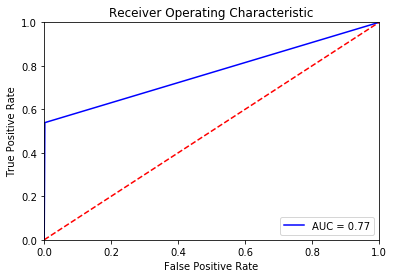

In [61]:
fpr, tpr, threshold = metrics.roc_curve(ytest['obscene'], Predrfmodel)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=200)
rfmodel.fit(X, ytrain)
Pred_Matrix = rfmodel.predict(x_test)
pred2 = pd.DataFrame(data=Pred_Matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred2)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred2))

Accuracy of the Random Forest model : 0.9100935828877005
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.97      0.42      0.59      4695
           1       0.47      0.07      0.12       491
           2       0.95      0.55      0.69      2544
           3       0.45      0.03      0.06       154
           4       0.80      0.40      0.53      2387
           5       0.59      0.04      0.08       442

   micro avg       0.91      0.41      0.56     10713
   macro avg       0.71      0.25      0.35     10713
weighted avg       0.88      0.41      0.55     10713
 samples avg       0.04      0.03      0.03     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=1000)
rfmodel.fit(X, ytrain)
Pred_Matrix = rfmodel.predict(x_test)
pred3 = pd.DataFrame(data=Pred_Matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred3)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred3))

Accuracy of the Random Forest model : 0.9073571189839572
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.98      0.37      0.54      4695
           1       0.49      0.05      0.10       491
           2       0.95      0.47      0.63      2544
           3       0.55      0.04      0.07       154
           4       0.83      0.31      0.45      2387
           5       0.65      0.03      0.06       442

   micro avg       0.93      0.35      0.51     10713
   macro avg       0.74      0.21      0.31     10713
weighted avg       0.90      0.35      0.49     10713
 samples avg       0.04      0.03      0.03     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=1500)
rfmodel.fit(X, ytrain)
Pred_Matrix = rfmodel.predict(x_test)
pred4 = pd.DataFrame(data=Pred_Matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred4)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred4))

Accuracy of the Random Forest model : 0.9072317847593583
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.98      0.37      0.54      4695
           1       0.51      0.05      0.10       491
           2       0.95      0.46      0.62      2544
           3       0.60      0.04      0.07       154
           4       0.83      0.31      0.45      2387
           5       0.62      0.03      0.06       442

   micro avg       0.93      0.35      0.51     10713
   macro avg       0.75      0.21      0.31     10713
weighted avg       0.90      0.35      0.49     10713
 samples avg       0.04      0.03      0.03     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
param_range = np.arange(100, 1600, 200)
from sklearn.model_selection import validation_curve
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             ytrain, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

In [16]:
train_scores

array([[0.99962399,        nan,        nan],
       [0.99963742,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [0.99965085,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])

In [17]:
param_range

array([ 100,  300,  500,  700,  900, 1100, 1300, 1500])

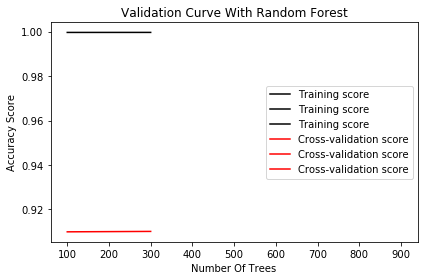

In [19]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_scores, label="Training score", color="black")
plt.plot(param_range, test_scores, label="Cross-validation score", color="red")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [24]:
#pred2[pred2[1]==1]

# concatentating xtest with predicted
testdf = pd.DataFrame({'ID':xtest.index, 'comment':xtest.values})
testdf.head()
submid = pd.DataFrame({'comment': testdf["comment"]})
df=pd.concat([submid, pd.DataFrame(pred2)], axis=1)
df = df.rename(columns={0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'})
df[df['severe_toxic']==1]

,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
333,oh suck dick,1,1,1,0,1,0
2398,hanibal911youre bastard proassadhanibal911your...,1,1,1,0,1,0
3127,lol haha fuckin loser wobbs yeah maybe epfnot ...,1,1,1,0,0,0
5048,fuck kansa bitch,1,1,1,0,1,0
7466,suck stupid bitch,1,1,1,0,1,0
7705,suck lick suck lick suck lick suck lick suck l...,1,1,1,0,1,0
9487,fuck fuck as,1,1,1,0,1,0
10188,fuck fuck keep blocking ill keep coming back f...,1,1,1,0,1,0
11163,chicken shit cock sucking pussy bastard,1,1,1,0,1,0
11340,p im fucking cunt rag enjoy taste nice warm pi...,1,1,1,0,0,0


In [43]:
# pred2[pred2[1]==1]
# xtest
Pred_Matrix

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [25]:
#pred2[pred2[1]==1]

# concatentating xtest with predicted
testdf = pd.DataFrame({'ID':xtest.index, 'comment':xtest.values})
testdf.head()
submid = pd.DataFrame({'comment': testdf["comment"]})
df=pd.concat([submid, pd.DataFrame(ytest)], axis=1)
df = df.rename(columns={0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'})
df[df['severe_toxic']==1]

,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
761,speaking top awardwinning particle physicist r...,1.0,1.0,1.0,0.0,1.0,0.0
1226,steve line may like bush view policy cannot ca...,1.0,1.0,1.0,0.0,0.0,0.0
1465,great someone made article biased planning buy...,1.0,1.0,1.0,0.0,1.0,0.0
1645,userdajes13 2007 szeptember 2,1.0,1.0,1.0,0.0,1.0,0.0
2249,karabakh separatist controle territory nonoffi...,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
158023,NaN,1.0,1.0,1.0,0.0,1.0,1.0
158155,NaN,1.0,1.0,1.0,0.0,1.0,0.0
158856,NaN,1.0,1.0,1.0,1.0,1.0,0.0
159312,NaN,1.0,1.0,1.0,0.0,1.0,0.0


In [83]:
ytrain

,toxic,severe_toxic,obscene,threat,insult,identity_hate
39130,0,0,0,0,0,0
25049,0,0,0,0,0,0
437,1,0,1,0,1,0
93449,0,0,0,0,0,0
35166,0,0,0,0,0,0
...,...,...,...,...,...,...
73349,0,0,0,0,0,0
109259,0,0,0,0,0,0
50057,0,0,0,0,0,0
5192,0,0,0,0,0,0


In [126]:
#-------------XGBoost-------------
# libaries for GBM
from xgboost import XGBClassifier
for i in range(0,6):
    xgb_model = XGBClassifier()
    xgb_model.fit(X, ytrain.iloc[:,i])
    Pred_Matrix[i]= xgb_model.predict(x_test)
#-----predicting values for test
pred_xgb = pd.DataFrame(data=Pred_Matrix)
pred_val_xgb =pred_xgb.T
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred_val_xgb)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred_val_xgb))

Accuracy of the Random Forest model : 0.9118900401069518
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.95      0.44      0.60      4695
           1       0.52      0.15      0.23       491
           2       0.91      0.63      0.75      2544
           3       0.58      0.12      0.19       154
           4       0.79      0.48      0.60      2387
           5       0.73      0.24      0.36       442

   micro avg       0.88      0.47      0.61     10713
   macro avg       0.75      0.34      0.46     10713
weighted avg       0.87      0.47      0.60     10713
 samples avg       0.04      0.04      0.04     10713



C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shwet\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
###################################################Final Model###############################################
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X, ytrain)

#-----predicting values for test-----
Pred_Matrix = rfmodel.predict(x_test)
pred1 = pd.DataFrame(data=Pred_Matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred1)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred1))

testdf = pd.DataFrame({'ID':xtest.index, 'comment':xtest.values})
submid = pd.DataFrame({'comment': testdf["comment"]})
df=pd.concat([submid, pd.DataFrame(pred_mnb_val)], axis=1)
df = df.rename(columns={0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'})